In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
fin_fraud_data = pd.read_csv('/kaggle/input/financial-fraud-detection-dataset/Synthetic_Financial_datasets_log.csv')
fin_fraud_copy = fin_fraud_data.copy()

In [3]:
fin_fraud_copy.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [4]:
fin_fraud_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
selected_columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest','isFraud']
df = fin_fraud_copy[selected_columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [6]:
# Calculate the differences between originating and destination balances
df.loc[:, 'orgDiff'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df.loc[:, 'destDiff'] = df['newbalanceDest'] - df['oldbalanceDest']

In [7]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud   orgDiff  destDiff  
0  M1979787155             0.0             0.0        0  -9839.64       0.0  
1  M2044282225             0.0             0.0        0  -1864.28       0.0  
2   C553264065             0.0             0.0        1   -181.00       0.0  
3    C38997010         21182.0             0.0        1   -181.00  -21182.0  
4  M1230701703             0.0             0.0        0 -11668.14       0.0

In [8]:
data1 = df.groupby('type').size().reset_index(name='count')

In [9]:
df_trans_type = data1.copy()
df_trans_type.rename(columns={'type':'transactions', 'count':'trans_total'}, inplace=True)
df_trans_type.head(5)

transactions  trans_total
0      CASH_IN      1399284
1     CASH_OUT      2237500
2        DEBIT        41432
3      PAYMENT      2151495
4     TRANSFER       532909

(-1.0999973225351762,
 1.0999998663212909,
 -1.0999991922384087,
 1.0999999615351623)

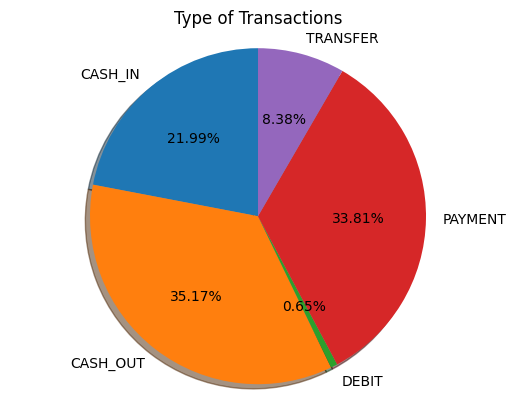

In [10]:
labels = df_trans_type.transactions
volume = df_trans_type.trans_total
explode = (0.2, 0.1, 0.1, 0.1, 0.1) # 5 volume to be exploded
#pie
plt.pie(volume, labels=labels, startangle=90,
        shadow=True, autopct='%1.2f%%')
#title
plt.title('Type of Transactions')
plt.axis('equal')

In [11]:
data2 = df.groupby('type')['amount'].sum().reset_index(name='total_amount')

In [12]:
from math import log, floor

def number_format(number):
    #function format number to B
    units = 'B'
    k = 1000000000.0
    #m = int(floor(log(number, k)))
    return '%.3f' % (number / k)

In [13]:
df_total_money = data2.copy()
df_total_money.rename(columns={'type':'transactions', 'total_amount':'money_total_in_Billion'}, inplace=True)
#format to Billion
df_total_money['money_total_in_Billion'] = \
            df_total_money['money_total_in_Billion'].apply(lambda x: number_format(x))
## format to float
df_total_money['money_total_in_Billion'] = \
            df_total_money['money_total_in_Billion'].apply(lambda x: float(x))

In [14]:
#sort the data
df_total_money = df_total_money.sort_values(by='money_total_in_Billion')

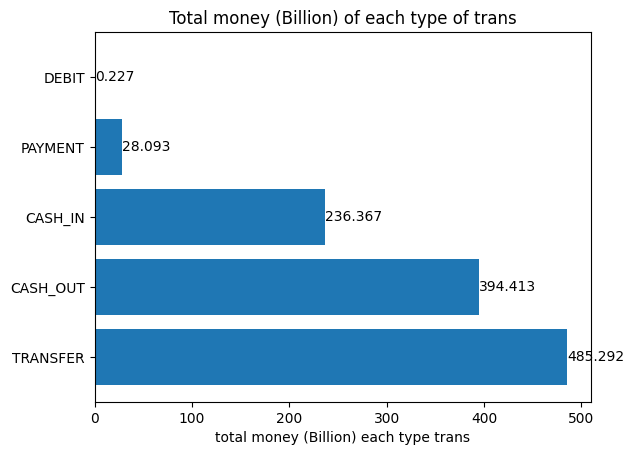

In [15]:
labels = df_total_money.transactions
y_pos = np.arange(len(labels))
volume = df_total_money.money_total_in_Billion
#bar chart
fig, ax = plt.subplots()

hbars = ax.barh(y_pos, volume, align='center')
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()
ax.set_xlabel('total money (Billion) each type trans')
ax.set_title('Total money (Billion) of each type of trans')

#Label with specially formatted floats
ax.bar_label(ax.containers[0])
plt.show()

In [16]:
def number_format_M(number):
    #function format number to Million
    units = 'B'
    k = 1000000.0
    return '%.3f' % (number / k)

In [17]:
df_money_recd_each_destacc = df.groupby('nameDest').agg(
    count_trans=('amount', 'size'),  # 'size' gives the count of rows (including NaN), which matches COUNT(1) in SQL
    total_amount=('amount', 'sum')   # 'sum' for the total amount
).reset_index()

df_money_recd_each_destacc = df_money_recd_each_destacc.sort_values(by='count_trans', ascending=False).reset_index(drop=True)
df_money_recd_each_destacc.rename(columns={'nameDest':'Dest_account',
                                     'count_trans':'count_trans',
                                     'total_amount':'total_amount_Million'}, inplace=True)

In [18]:
#format to Million column TotalOrgDiff, TotalDestDiff
df_money_recd_each_destacc = df_money_recd_each_destacc.set_index('Dest_account')
df_money_recd_each_destacc['total_amount_Million'] = \
            df_money_recd_each_destacc['total_amount_Million'].apply(lambda x: float(number_format_M(x)))

In [19]:
df_money_recd_each_destacc.head(5)

count_trans  total_amount_Million
Dest_account                                   
C1286084959           113                77.429
C985934102            109                42.423
C665576141            105                88.749
C2083562754           102                53.074
C248609774            101                40.680

In [20]:
# Set of rules to identify known fraud-based
rules_fraud_based_df = df.copy()
conditions = (
    ((df['oldbalanceOrg'] <= 56900) & 
     (df['type'] == 'TRANSFER') & 
     (df['newbalanceDest'] <= 105)) |
    ((df['oldbalanceOrg'] > 56900) & 
     (df['newbalanceOrig'] <= 12)) |
    ((df['oldbalanceOrg'] > 56900) & 
     (df['newbalanceOrig'] > 12) & 
     (df['amount'] > 1160000))
)

rules_fraud_based_df['label'] = np.where(conditions, 1, 0)

# Calculate proportions
fraud_cases = rules_fraud_based_df['label'].sum()
total_cases = len(rules_fraud_based_df)
fraud_pct = fraud_cases / total_cases

# Provide a quick statistics
print(f"Based on these rules, we have flagged {fraud_cases} ({fraud_pct:.2%}) fraud cases out of a total of {total_cases} cases.")


Based on these rules, we have flagged 255640 (4.02%) fraud cases out of a total of 6362620 cases.


In [21]:
rules_fraud_based_df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud   orgDiff  destDiff  \
0  M1979787155             0.0             0.0        0  -9839.64       0.0   
1  M2044282225             0.0             0.0        0  -1864.28       0.0   
2   C553264065             0.0             0.0        1   -181.00       0.0   
3    C38997010         21182.0             0.0        1   -181.00  -21182.0   
4  M1230701703             0.0             0.0        0 -11668.14       0.0   

   label  
0      0  
1      0  
2      1  
3      0  
4      0

In [22]:
data3 = rules_fraud_based_df.groupby('label').agg(
    count=('label', 'size'), 
    total_amount=('amount', 'sum')
).reset_index()

In [23]:
df_based_rules = data3.copy()
df_based_rules.rename(columns={'count':'transactions'}, inplace=True)
df_based_rules['flagged_label'] = np.where(df_based_rules['label']==1, 'fraud', 'normal')
df_based_rules

label  transactions  total_amount flagged_label
0      0       6106980  1.015069e+12        normal
1      1        255640  1.293243e+11         fraud

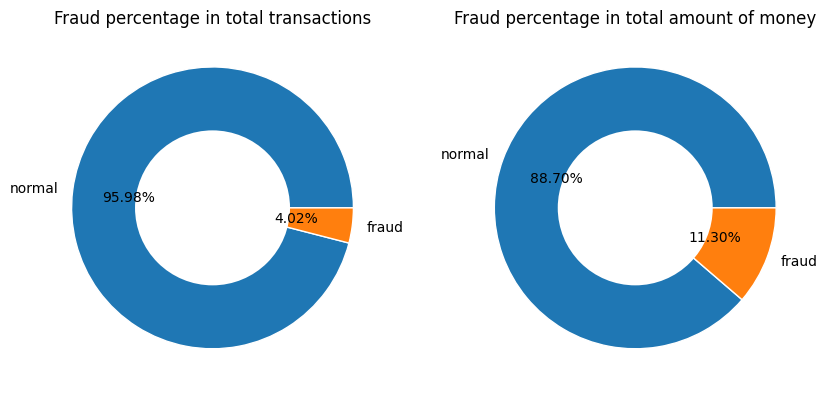

In [24]:
labels = df_based_rules.flagged_label
volume = df_based_rules.transactions
amount = df_based_rules.total_amount
explode = (0.1, 0.0) #2 volumes to be exploded 

# double pie charts
# Make figure and axes
fig, axs = plt.subplots(1,2, figsize=(10, 5))
#first pie
axs[0].pie(volume, labels=labels, autopct='%1.2f%%',\
            wedgeprops= {"edgecolor":"white", 'linewidth': 1, 'antialiased': True})
axs[0].set_title("Fraud percentage in total transactions")

# Adding Circle in first Pie chart
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
axs[0].add_artist(centre_circle)
#second pie
axs[1].pie(amount, labels=labels, autopct='%1.2f%%',\
             wedgeprops= {"edgecolor":"white", 'linewidth': 1, 'antialiased': True})
axs[1].set_title("Fraud percentage in total amount of money")

# Adding Circle in second Pie chart
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
axs[1].add_artist(centre_circle)

plt.show()

In [25]:
aggregated_df = rules_fraud_based_df.groupby(['nameOrig', 'nameDest', 'label']).agg(
    TotalOrgDiff=('orgDiff', 'sum'),
    TotalDestDiff=('destDiff', 'sum')
).reset_index()
data4 =  aggregated_df[aggregated_df['TotalDestDiff'] >= 1000000].reset_index(drop=True)

In [26]:
data4.head(10)

nameOrig     nameDest  label  TotalOrgDiff  TotalDestDiff
0  C1000005353   C292963054      0     -24996.00     3228390.11
1  C1000005749  C1247252665      0          0.00     3229333.12
2   C100002734   C776253559      0          0.00     1288884.49
3  C1000028246  C1902027015      0          0.00     1467941.17
4  C1000044288  C1105638219      0          0.00     1306702.73
5  C1000069949  C1116776735      0     121108.11     1526158.74
6  C1000077677  C1483097104      1    -175841.00     1627720.86
7  C1000084237    C55040366      1    -108404.00     3433978.54
8  C1000097327   C642584095      0          0.00     1003721.94
9  C1000104995  C1409969112      1    -101733.00     2084473.48

In [27]:
df_top_diff_Org_Dest = data4.copy()
df_top_diff_Org_Dest['flagged_label'] = np.where(df_top_diff_Org_Dest['label']==1, 'fraud', 'normal')
df_top_diff_Org_Dest['name'] = df_top_diff_Org_Dest.nameOrig + df_top_diff_Org_Dest.nameDest
df_top_diff_Org_Dest.head()

nameOrig     nameDest  label  TotalOrgDiff  TotalDestDiff flagged_label  \
0  C1000005353   C292963054      0      -24996.0     3228390.11        normal   
1  C1000005749  C1247252665      0           0.0     3229333.12        normal   
2   C100002734   C776253559      0           0.0     1288884.49        normal   
3  C1000028246  C1902027015      0           0.0     1467941.17        normal   
4  C1000044288  C1105638219      0           0.0     1306702.73        normal   

                     name  
0   C1000005353C292963054  
1  C1000005749C1247252665  
2    C100002734C776253559  
3  C1000028246C1902027015  
4  C1000044288C1105638219

In [28]:
def number_format_M(number):
    #function format number to Million
    units = 'B'
    k = 1000000.0
    return '%.3f' % (number / k)

In [29]:
#format to Million column TotalOrgDiff, TotalDestDiff
df_top_diff_Org_Dest['TotalOrgDiff'] = \
            df_top_diff_Org_Dest['TotalOrgDiff'].apply(lambda x: number_format_M(x))
df_top_diff_Org_Dest['TotalDestDiff'] = \
            df_top_diff_Org_Dest['TotalDestDiff'].apply(lambda x: number_format_M(x))

df_top_diff_Org_Dest.head()

nameOrig     nameDest  label TotalOrgDiff TotalDestDiff flagged_label  \
0  C1000005353   C292963054      0       -0.025         3.228        normal   
1  C1000005749  C1247252665      0        0.000         3.229        normal   
2   C100002734   C776253559      0        0.000         1.289        normal   
3  C1000028246  C1902027015      0        0.000         1.468        normal   
4  C1000044288  C1105638219      0        0.000         1.307        normal   

                     name  
0   C1000005353C292963054  
1  C1000005749C1247252665  
2    C100002734C776253559  
3  C1000028246C1902027015  
4  C1000044288C1105638219

## What type of transactions are associated with fraud?

In [30]:
data5 = rules_fraud_based_df.groupby(['type', 'label']).size().reset_index(name='transactions')

In [31]:
df_fraud_in_type_trans = data5.copy()
df_fraud_in_type_trans = df_fraud_in_type_trans.rename(columns={'transactions':'sum_trans'})
df_fraud_in_type_trans['label'] = np.where(df_fraud_in_type_trans['label'] == 1, 'fraud', 'regular')
df_fraud_in_type_trans

type    label  sum_trans
0   CASH_IN  regular    1399219
1   CASH_IN    fraud         65
2  CASH_OUT  regular    2052790
3  CASH_OUT    fraud     184710
4     DEBIT  regular      41401
5     DEBIT    fraud         31
6   PAYMENT  regular    2150909
7   PAYMENT    fraud        586
8  TRANSFER  regular     462661
9  TRANSFER    fraud      70248

In [32]:
outer = df_fraud_in_type_trans.groupby('type').sum(numeric_only=True)
display(outer)
inner = df_fraud_in_type_trans.groupby(['type', 'label']).sum()
display(inner)
inner_labels = inner.index.get_level_values(1)
display(inner_labels)

sum_trans
type               
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909

sum_trans
type     label             
CASH_IN  fraud           65
         regular    1399219
CASH_OUT fraud       184710
         regular    2052790
DEBIT    fraud           31
         regular      41401
PAYMENT  fraud          586
         regular    2150909
TRANSFER fraud        70248
         regular     462661

Index(['fraud', 'regular', 'fraud', 'regular', 'fraud', 'regular', 'fraud',
       'regular', 'fraud', 'regular'],
      dtype='object', name='label')

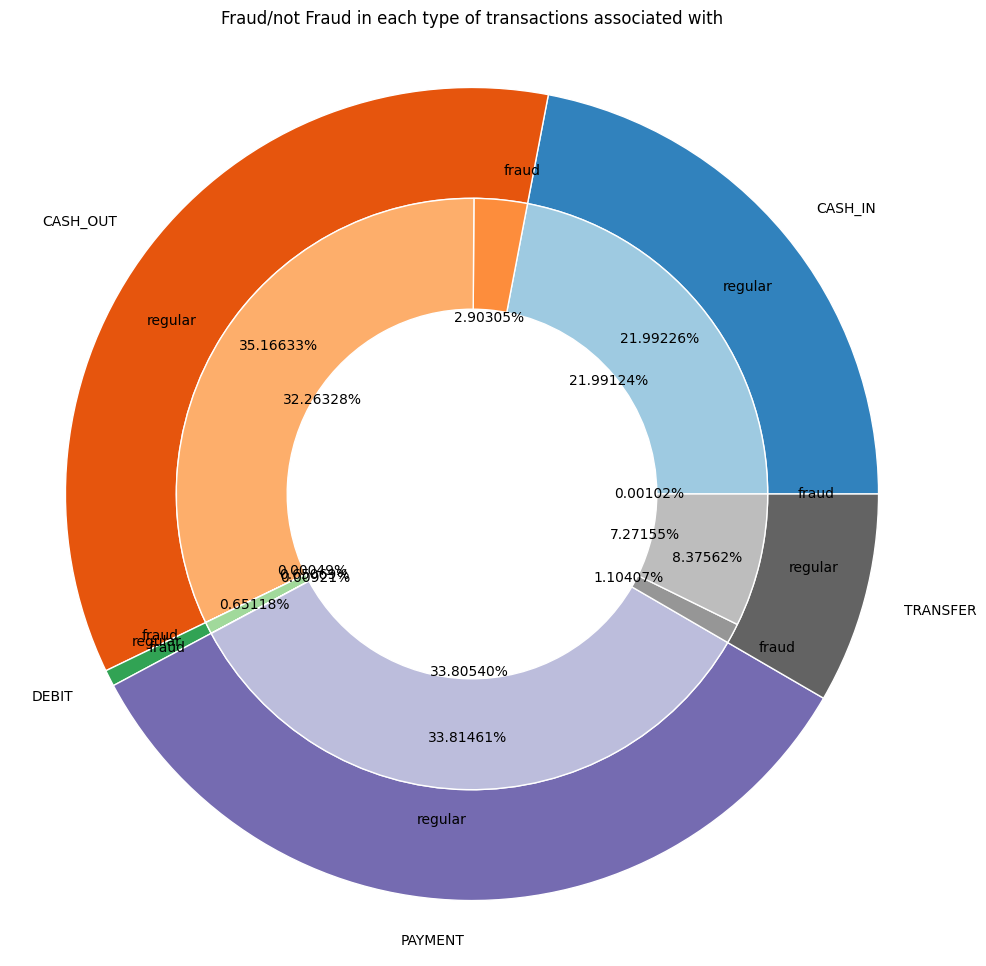

In [33]:
fig, ax = plt.subplots(figsize=(24,12))
size = 0.3
#cmap color
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(5)*4)
inner_colors = cmap([1,2, 5,6, 9,10, 13,14, 17,18])
#outter pie
ax.pie(outer.values.flatten(), 
       radius=1.1, labels=outer.index, autopct='%1.5f%%', colors=outer_colors,
      wedgeprops=dict(width=size, edgecolor='w'))
#inner pie
ax.pie(inner.values.flatten(), radius=1.1-size, labels=inner_labels, colors=inner_colors, 
       autopct='%1.5f%%', wedgeprops=dict(width=size, edgecolor='w'))
#tittle
ax.set(title="Fraud/not Fraud in each type of transactions associated with")

plt.show()

## Rules vs. ML model
Instead of creating specific rules that will change over time, we can be more precise and more productive by using ML model

### Create training and testing datasets
Using randomplit to create our training and testing datsets, to build and vilidate our generalized ML model

In [ ]:
!pip install pyspark -q

In [ ]:
pip install pyspark

In [36]:
#import pyspark
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, SQLContext
print(f"PySpark Version : {pyspark.__version__}")

ModuleNotFoundError: No module named 'pyspark'

In [ ]:
#Create a spark Context class, with custom config
conf = SparkConf()
conf.set('spark.default.parallelism', 700)
conf.set('spark.sql.shuffle.partitions', 700)
conf.set('spark.driver.memory', '30g')
conf.set('spark.driver.cores', 8)
conf.set('spark.executor.cores', 8)
conf.set('spark.executor.memory', '30g')
sc = SparkContext.getOrCreate(conf)

In [ ]:
## Create spark session
spark = SparkSession.builder.master('local[*]').\
                config('spark.sql.debug.maxToStringFields', '100').\
                appName("Python Spark Dataframes Financial Fruad").getOrCreate()

In [ ]:
df = spark.createDataFrame(df)

In [ ]:
#initially split our dataset
(train, test) = df.randomSplit([0.8, 0.2], seed=12345)

#Cache the training and test datasets
train.cache()
test.cache()

#print out dataset counts
print("Total rows: %s, Training rows: %s, Test rows: %s" %\
      (df.count(), train.count(), test.count()))

## Create ML pipeline
When creating an ML model, there are typically a set of repeated steps(e.g. StringIndexer, VectorAssembler, etc.). By creating a ML pipeline, we can reuse this pipeline( and all of its steps) to retrain on a new and /or updated dataset.

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier

#Encodes a string column of labels to a column of label indices
indexer = StringIndexer(inputCol="type", outputCol="typeIndexed")

#VectorAssembler is a transformer that combines
#a given list of columns into a single vector column
va = VectorAssembler(inputCols=["typeIndexed", "amount", "oldbalanceOrg", "newbalanceOrig",
                               "oldbalanceDest", "newbalanceDest", "orgDiff", "destDiff"], outputCol="features")

#Using the DecisionTree classifier model
dt = DecisionTreeClassifier(labelCol='isFraud', featuresCol='features', seed=54321, maxDepth=5)

# Create our pipeline stages
pipeline = Pipeline(stages=[indexer, va, dt])

In [ ]:
#view the Decision Tree model
dt_model = pipeline.fit(train)

In [ ]:
print(dt_model.stages[-1].toDebugString)

In [ ]:
#extract features input and target variable
features_input = ["typeIndexed", "amount","oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest", "orgDiff", "destDiff"]
target = "isFraud"

#extract decision tree from our model
dt_extracted = dt_model.stages[2]

#recompute the dataset on which the model was trained, with StringIndexer encoding only
dataset = Pipeline(stages=[indexer]).fit(train).transform(train).toPandas()[features_input+[target]]

In [ ]:
!pip install dtreeviz -q

In [ ]:
#import viz library
import dtreeviz
viz_model = dtreeviz.model(dt_extracted,
                          X_train=dataset[features_input],
                          y_train=dataset[target],
                          feature_names=features_input,
                          target_name=target, class_names=['0', '1'])

In [ ]:
#take long to viz large scale data
viz_model.view(fancy=False)

## Use BinaryClassificationEvaluator
Determine the accuracy of the model by reviewing the areaUnderPR and areaUnderROC

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

#evaluate the model
evaluatorPR = BinaryClassificationEvaluator(labelCol="isFraud",
                                            rawPredictionCol='prediction',
                                            metricName='areaUnderPR')
evaluatorAUC = BinaryClassificationEvaluator(labelCol="isFraud",
                                             rawPredictionCol="prediction",
                                             metricName="areaUnderROC")

### Setup CrossValidation
To potentially improve our model, we will use CrossValidator in conjunction with the ParamGriBuilder to automate trying out different parameters.

NOTE: We are using evaluatorPR as our evaluator as the Precision-Recall curve is often better for an imbalanced distribution.

In [ ]:
##40 minutes running time sections
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

#Build the grid of different parameters
paramGird = ParamGridBuilder().addGrid(dt.maxDepth, [5, 10, 15]).addGrid(dt.maxBins, [10, 20, 30]).build()

#Build out the cross validation
crossval = CrossValidator(estimator=dt,
                         estimatorParamMaps= paramGird,
                         evaluator=evaluatorPR,
                         numFolds=3)

pipelineCV = Pipeline(stages=[indexer, va, crossval])

#Train the model using the pipeline, params grid, and preceding BinaryClassificationEvaluator
cvModel_u = pipelineCV.fit(train)

### Review the results
review the areaUnderPR (Area Under Precision Recall curve) and areaUnderROC(Area Under Receiver Operating Characteristic) or AUC (Area Under Curve) metrics.

In [ ]:
# Build the best model (training and test datasets)
train_pred = cvModel_u.transform(train)
test_pred = cvModel_u.transform(test)

#Evaluate the model on training datasets
pr_train = evaluatorPR.evaluate(train_pred)
auc_train = evaluatorAUC.evaluate(train_pred)

#Evaluate the model on test datasets
pr_test = evaluatorPR.evaluate(test_pred)
auc_test = evaluatorAUC.evaluate(test_pred)

#show the results
print("PR train:", pr_train)
print("AUC train:", auc_train)
print("PR test:", pr_test)
print("AUC test:", auc_test)
###